In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/rent_airbnb_all_features.csv')
print(df.shape)
df.head()

(1606, 37)


,year,quarter,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),From 6 months to 12 motnhs,Over 12 months,...,woman_junior_high_school,woman_senior_high_school,woman_unknown,woman_without education,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio
0,2015.0,2015-01-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",697.16,11.51,2949.0,8425.0,...,1464.0,2067.0,5.0,470.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015.0,2015-04-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",708.03,12.02,2949.0,8425.0,...,1464.0,2067.0,5.0,470.0,73.343300,903.0,262.921373,0.631229,0.128461,0.016611
2,2015.0,2015-07-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",729.00,14.00,2949.0,8425.0,...,1464.0,2067.0,5.0,470.0,75.124776,1114.0,259.641831,0.607720,0.106822,0.002693
3,2015.0,2015-10-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",751.60,13.43,2949.0,8425.0,...,1464.0,2067.0,5.0,470.0,72.410441,1111.0,271.629163,0.580558,0.067507,0.001800
4,2016.0,2016-01-01,1.0,Ciutat Vella,4.0,"Sant Pere, Santa Caterina i la Ribera",759.16,12.94,2563.0,7550.0,...,1509.0,2196.0,121.0,376.0,72.739919,992.0,260.639113,0.561492,0.073589,0.000000


## Simplifying the features

We are going to make some changes to the features:
- We'll leave 4 levels for the nationalities data: *1 Spanish", *1 foreign", *2 or more Spanish*, *2 or more foreigners*
- Two levels of unemployment: *short-term unemployment* (under 12 months) and *long-term unemployment* (above 12 months)
- Three levels of education (women + men): *no education*, *medium education*, *bachelors degree*

In [3]:
df.columns

Index(['year', 'quarter', 'district_code', 'district_name',
       'neighbourhood_code', 'neighbourhood_name', 'price_month(€)',
       'price_m2_month(€)', 'From 6 months to 12 motnhs', 'Over 12 months',
       'Up to 6 months', '1 Spanish', '1 foreigner', '2 Spanish',
       '2 foreigners', '3 Spanish', '3 foreigners', '4 espanyols o més',
       'more than 4 foreigners', 'man_bachelors_degree',
       'man_elementary_school', 'man_junior_high_school',
       'man_senior_high_school', 'man_unknown', 'man_without education',
       'woman_bachelors_degree', 'woman_elementary_school',
       'woman_junior_high_school', 'woman_senior_high_school', 'woman_unknown',
       'woman_without education', 'airbnb_price(€)', 'n_airbnb_listings',
       'availability_365', 'airbnb_ratio_business',
       'airbnb_professional_ratio', 'airbnb_mega_host_ratio'],
      dtype='object')

In [4]:
def sum_columns_and_drop(df, columns, new_column, position):
    cols_range = []
    for col in columns:
        index_no = df.columns.get_loc(col)
        cols_range.append(index_no)
    cols_range = np.array(cols_range)
    
    df.insert(position, new_column, df.iloc[:, cols_range].sum(axis=1))
    return df.drop(columns=columns)


In [5]:
df = sum_columns_and_drop(df, ['2 Spanish', '3 Spanish', '4 espanyols o més'], 'more than 2 Spanish', 13)
df = sum_columns_and_drop(df, ['2 foreigners', '3 foreigners', 'more than 4 foreigners'], 'more than 2 foreigners', 13)
df.iloc[:5, 11:17]

,1 Spanish,1 foreigner,more than 2 foreigners,more than 2 Spanish,man_bachelors_degree,man_elementary_school
0,3812.0,2108.0,2041.0,3572.0,3480.0,2225.0
1,3812.0,2108.0,2041.0,3572.0,3480.0,2225.0
2,3812.0,2108.0,2041.0,3572.0,3480.0,2225.0
3,3812.0,2108.0,2041.0,3572.0,3480.0,2225.0
4,3790.0,2215.0,2078.0,3534.0,3530.0,2013.0


In [6]:
df = sum_columns_and_drop(df, ['Up to 6 months', 'From 6 months to 12 motnhs'], 'short-term unemployment', 9)
df = df.rename(columns={'Over 12 months':'long-term unemployment'})
df.iloc[:5, 7:12]

,price_m2_month(€),short-term unemployment,long-term unemployment,1 Spanish,1 foreigner
0,11.51,11574.0,8425.0,3812.0,2108.0
1,12.02,11574.0,8425.0,3812.0,2108.0
2,14.00,11574.0,8425.0,3812.0,2108.0
3,13.43,11574.0,8425.0,3812.0,2108.0
4,12.94,10754.0,7550.0,3790.0,2215.0


In [7]:
df = sum_columns_and_drop(df, ['man_without education', 'woman_without education', 'woman_unknown', 'man_unknown'], 'no education', 14)
df = sum_columns_and_drop(df, ['man_elementary_school', 'man_junior_high_school', 'man_senior_high_school',
                               'woman_elementary_school', 'woman_junior_high_school', 'woman_senior_high_school'], 'medium education', 15)
df = sum_columns_and_drop(df, ['man_bachelors_degree', 'woman_bachelors_degree'], 'bachelors degree', 16)

df.iloc[:5, 12:18]

,more than 2 foreigners,more than 2 Spanish,no education,medium education,bachelors degree,airbnb_price(€)
0,2041.0,3572.0,667.0,11846.0,7482.0,NaN
1,2041.0,3572.0,667.0,11846.0,7482.0,73.343300
2,2041.0,3572.0,667.0,11846.0,7482.0,75.124776
3,2041.0,3572.0,667.0,11846.0,7482.0,72.410441
4,2078.0,3534.0,752.0,11759.0,7573.0,72.739919


## XGBoost + lags model for one neighbourhood

In [8]:
neighbourhoods = df['neighbourhood_name'].unique().tolist()
neighbourhoods

['Sant Pere, Santa Caterina i la Ribera',
 'el Barri Gòtic',
 'el Raval',
 'la Barceloneta',
 'Sant Antoni',
 'el Fort Pienc',
 "l'Antiga Esquerra de l'Eixample",
 "la Dreta de l'Eixample",
 "la Nova Esquerra de l'Eixample",
 'la Sagrada Família',
 'Vallcarca i els Penitents',
 "el Camp d'en Grassot i Gràcia Nova",
 'el Coll',
 'la Salut',
 'la Vila de Gràcia',
 'Can Baró',
 'Horta',
 'Montbau',
 'Sant Genís dels Agudells',
 'el Baix Guinardó',
 'el Carmel',
 'el Guinardó',
 'la Clota',
 "la Font d'en Fargues",
 'la Teixonera',
 "la Vall d'Hebron",
 'Pedralbes',
 'la Maternitat i Sant Ramon',
 'les Corts',
 'Can Peguera',
 'Canyelles',
 'Ciutat Meridiana',
 'Porta',
 'Torre Baró',
 'Vallbona',
 'Verdun',
 'Vilapicina i la Torre Llobeta',
 'el Turó de la Peira',
 'la Guineueta',
 'la Prosperitat',
 'la Trinitat Nova',
 'les Roquetes',
 'Baró de Viver',
 'Navas',
 'Sant Andreu',
 'el Bon Pastor',
 'el Congrés i els Indians',
 'la Sagrera',
 'la Trinitat Vella',
 'Diagonal Mar i el Front 

In [9]:
# chosen_neighb = 'el Barri Gòtic'
chosen_neighb = 'Pedralbes'
df_neighb = df[df['neighbourhood_name'] == chosen_neighb]
df_neighb

,year,quarter,district_code,district_name,neighbourhood_code,neighbourhood_name,price_month(€),price_m2_month(€),short-term unemployment,long-term unemployment,...,more than 2 Spanish,no education,medium education,bachelors degree,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio
572,2015.0,2015-01-01,4.0,Les Corts,21.0,Pedralbes,1250.83,11.37,2058.0,1196.0,...,2756.0,173.0,4656.0,4970.0,NaN,NaN,NaN,NaN,NaN,NaN
573,2015.0,2015-04-01,4.0,Les Corts,21.0,Pedralbes,1711.45,12.73,2058.0,1196.0,...,2756.0,173.0,4656.0,4970.0,77.875000,16.0,294.750000,0.687500,0.062500,0.00
574,2015.0,2015-07-01,4.0,Les Corts,21.0,Pedralbes,2034.00,17.00,2058.0,1196.0,...,2756.0,173.0,4656.0,4970.0,89.133333,15.0,268.933333,0.666667,0.066667,0.00
575,2015.0,2015-10-01,4.0,Les Corts,21.0,Pedralbes,1860.30,15.65,2058.0,1196.0,...,2756.0,173.0,4656.0,4970.0,95.642857,14.0,259.000000,0.571429,0.000000,0.00
576,2016.0,2016-01-01,4.0,Les Corts,21.0,Pedralbes,1572.56,15.06,1769.0,1036.0,...,2719.0,287.0,4558.0,5016.0,70.250000,20.0,267.500000,0.450000,0.000000,0.00
577,2016.0,2016-04-01,4.0,Les Corts,21.0,Pedralbes,1660.43,14.23,1769.0,1036.0,...,2719.0,287.0,4558.0,5016.0,NaN,NaN,NaN,NaN,NaN,NaN
578,2016.0,2016-07-01,4.0,Les Corts,21.0,Pedralbes,1689.60,14.44,1769.0,1036.0,...,2719.0,287.0,4558.0,5016.0,NaN,NaN,NaN,NaN,NaN,NaN
579,2016.0,2016-10-01,4.0,Les Corts,21.0,Pedralbes,1692.20,14.96,1769.0,1036.0,...,2719.0,287.0,4558.0,5016.0,121.447368,38.0,231.394737,0.473684,0.026316,0.00
580,2017.0,2017-01-01,4.0,Les Corts,21.0,Pedralbes,1856.57,16.05,1615.0,966.0,...,2699.0,318.0,4541.0,5155.0,112.500000,34.0,236.117647,0.441176,0.029412,0.00
581,2017.0,2017-04-01,4.0,Les Corts,21.0,Pedralbes,1666.63,16.76,1615.0,966.0,...,2699.0,318.0,4541.0,5155.0,177.914286,35.0,199.628571,0.342857,0.000000,0.00


In [10]:
time_series_df = df_neighb[['quarter', 'price_month(€)']].copy()
time_series_df = time_series_df.set_index('quarter')
print(time_series_df.shape)
time_series_df.head()

(22, 1)


,price_month(€)
quarter,
2015-01-01,1250.83
2015-04-01,1711.45
2015-07-01,2034.00
2015-10-01,1860.30
2016-01-01,1572.56


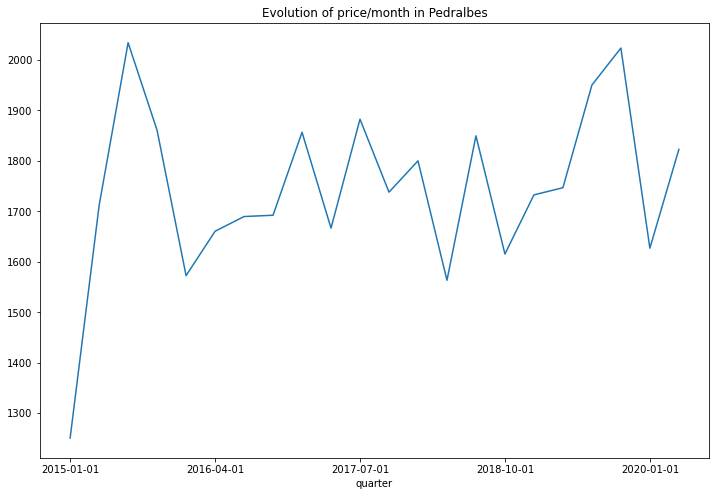

In [11]:
time_series_df['price_month(€)'].plot(figsize=(12,8))
_ = plt.title(f'Evolution of price/month in {chosen_neighb}')

In [12]:
# Adding the lag of the target variable from 2 steps back up to 11
for i in range(2, 12):
    time_series_df["lag_{}".format(i)] = time_series_df['price_month(€)'].shift(i, axis=0)

In [13]:
time_series_df

,price_month(€),lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11
quarter,,,,,,,,,,,
2015-01-01,1250.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,1711.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01,2034.00,1250.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,1860.30,1711.45,1250.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,1572.56,2034.00,1711.45,1250.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01,1660.43,1860.30,2034.00,1711.45,1250.83,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,1689.60,1572.56,1860.30,2034.00,1711.45,1250.83,NaN,NaN,NaN,NaN,NaN
2016-10-01,1692.20,1660.43,1572.56,1860.30,2034.00,1711.45,1250.83,NaN,NaN,NaN,NaN
2017-01-01,1856.57,1689.60,1660.43,1572.56,1860.30,2034.00,1711.45,1250.83,NaN,NaN,NaN


In [14]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = time_series_df['price_month(€)']
X = time_series_df.drop(['price_month(€)'], axis=1)

X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)


In [15]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [16]:
# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [17]:
X_test

,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11
quarter,,,,,,,,,,
2018-10-01,1563.31,1799.91,1737.92,1882.42,1666.63,1856.57,1692.20,1689.60,1660.43,1572.56
2019-01-01,1849.52,1563.31,1799.91,1737.92,1882.42,1666.63,1856.57,1692.20,1689.60,1660.43
2019-04-01,1615.31,1849.52,1563.31,1799.91,1737.92,1882.42,1666.63,1856.57,1692.20,1689.60
2019-07-01,1732.50,1615.31,1849.52,1563.31,1799.91,1737.92,1882.42,1666.63,1856.57,1692.20
2019-10-01,1746.70,1732.50,1615.31,1849.52,1563.31,1799.91,1737.92,1882.42,1666.63,1856.57
2020-01-01,1950.10,1746.70,1732.50,1615.31,1849.52,1563.31,1799.91,1737.92,1882.42,1666.63
2020-04-01,2023.40,1950.10,1746.70,1732.50,1615.31,1849.52,1563.31,1799.91,1737.92,1882.42


In [18]:
# xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X=X_train, y=y_train)
y_pred = xgb.predict(X_test)

In [19]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

tscv = TimeSeriesSplit(n_splits=5)
cv = cross_val_score(xgb, X_train, y_train, cv=tscv, scoring="neg_mean_absolute_error")

mae = cv.mean() * (-1)
deviation = cv.std()
 
scale=.95
lower = y_pred - (mae + scale * deviation)
upper = y_pred + (mae + scale * deviation)

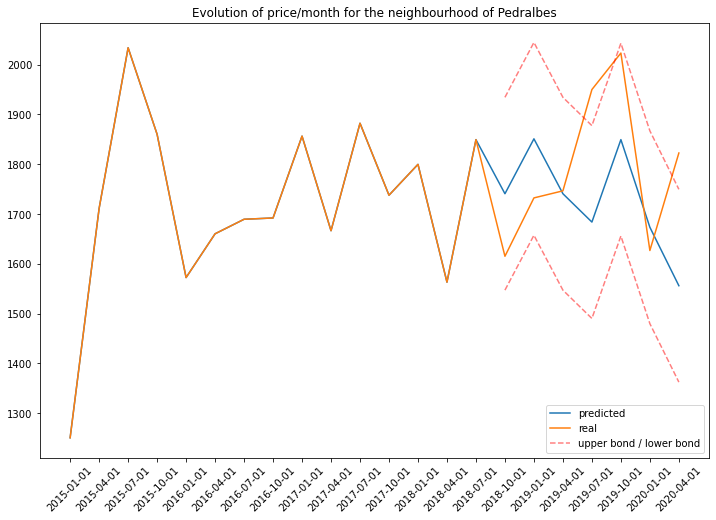

In [20]:
fig = plt.figure(figsize=(12,8))
plt.plot(X.index, np.concatenate((y_train,y_pred)), label='predicted')
plt.plot(X.index, y, label='real')
plt.plot(X_test.index, lower, "r--", label="upper bond / lower bond", alpha=0.5)
plt.plot(X_test.index, upper, "r--", alpha=0.5)

plt.legend()
_ = plt.xticks(rotation=45)
_ = plt.title(f'Evolution of price/month for the neighbourhood of {chosen_neighb}')

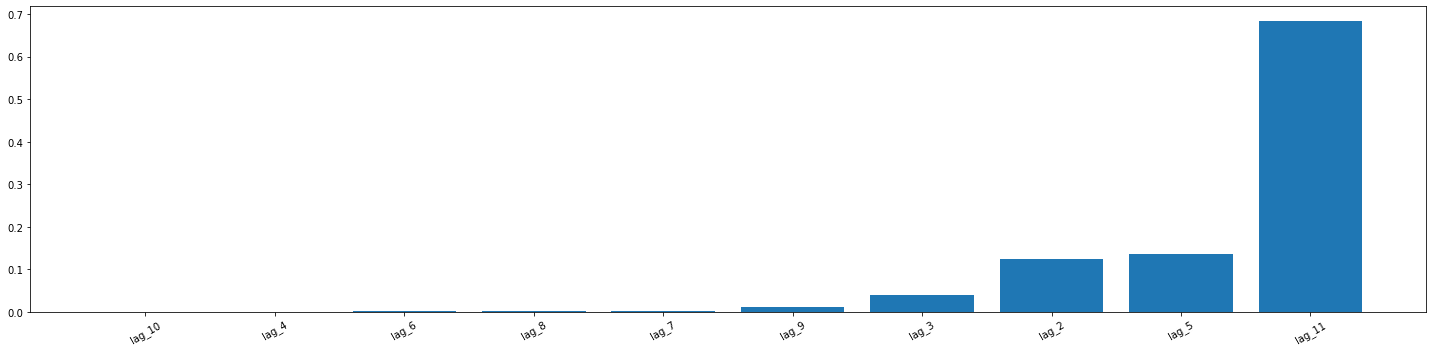

In [21]:
coefficients = pd.Series({k: v for k, v in zip(X.columns, xgb.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(coefficients.index, coefficients.values)
_ = plt.xticks(rotation=30)
plt.tight_layout()

### Adding more features

In [22]:
all_features_df = pd.concat([time_series_df, 
           df_neighb.drop(columns=['year', 'district_code', 'district_name', 
                                   'neighbourhood_code', 'neighbourhood_name', 'price_month(€)', 'price_m2_month(€)']).set_index('quarter')
          ], axis=1)

In [25]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = all_features_df['price_month(€)']
X = all_features_df.drop(['price_month(€)'], axis=1)

X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

In [26]:
# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X_scaled, y, test_size=0.3)

xgb = XGBRegressor()
xgb.fit(X=X_train, y=y_train)
y_pred = xgb.predict(X_test)

In [27]:
cv = cross_val_score(xgb, X_train, y_train, cv=TimeSeriesSplit(n_splits=5), scoring="neg_mean_absolute_error")

mae = cv.mean() * (-1)
deviation = cv.std()
 
scale=1
lower = y_pred - (mae + scale * deviation)
upper = y_pred + (mae + scale * deviation)

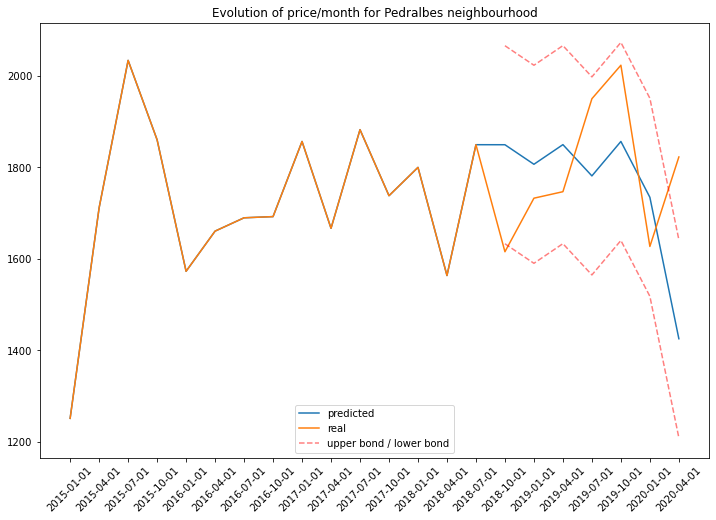

In [28]:
fig = plt.figure(figsize=(12,8))
plt.plot(X.index, np.concatenate((y_train,y_pred)), label='predicted')
plt.plot(X.index, y, label='real')
plt.plot(X_test.index, lower, "r--", label="upper bond / lower bond", alpha=0.5)
plt.plot(X_test.index, upper, "r--", alpha=0.5)

plt.legend()
_ = plt.xticks(rotation=45)
_ = plt.title(f'Evolution of price/month for {chosen_neighb} neighbourhood')

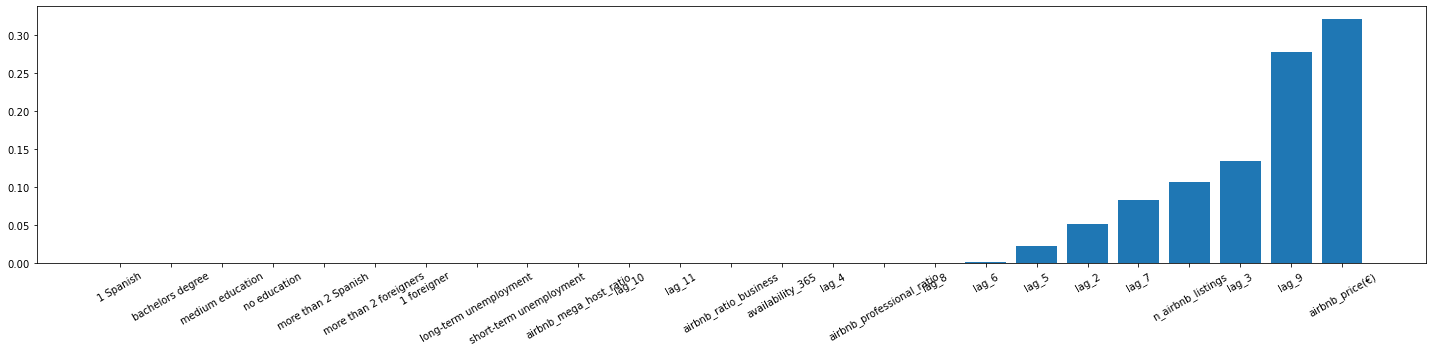

In [29]:
coefficients = pd.Series({k: v for k, v in zip(X.columns, xgb.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(coefficients.index, coefficients.values)
_ = plt.xticks(rotation=30)
plt.tight_layout()

## XGBoost + lags model for all Barcelona